# Sheet

In [2]:
from scipy.stats import spearmanr, f, t
import numpy as np
from typing import Tuple, Dict, List
import pandas as pd
import plotly.express as px

In [3]:
def calculate_p_value(statistics: float, *, distribution, alternative: str, **kwargs) -> float:
    right_tail_p_value = distribution.sf(statistics, **kwargs)
    left_tail_p_value = distribution.cdf(statistics, **kwargs)  
    two_sided_p_value = 2 * min(left_tail_p_value, right_tail_p_value)

    if alternative == 'less':
        p_value = left_tail_p_value
    elif alternative == 'greater':
        p_value = right_tail_p_value
    else:
        p_value = two_sided_p_value

    return p_value

In [4]:
def rankdata(x: np.ndarray) -> np.ndarray:
    sorted_x = np.sort(x)
    ranks = np.arange(len(sorted_x), dtype=float) + 1

    value_to_count = dict(zip(*np.unique(sorted_x, return_counts=True)))

    value_to_rank = {}
    for value, count in value_to_count.items():
        left = np.searchsorted(sorted_x, value, side='left')
        right = np.searchsorted(sorted_x, value, side='right')
        value_to_rank[value] = ranks[left:right].sum() / count

    return np.array([value_to_rank[value] for value in x])

In [5]:
def minor(array: np.ndarray, i: int, j: int) -> float:
    rows = list(range(array.shape[0]))
    rows.remove(i)

    columns = list(range(array.shape[1]))
    columns.remove(j)

    return array[rows, :][:, columns]

In [6]:
def cofactor(array: np.ndarray, i: int, j: int) -> float:
    return (-1) ** (i + j) * np.linalg.det(minor(array, i, j))

In [7]:
def calculate_q(y_true: np.ndarray, y_pred: np.ndarray) -> Tuple[float, float, float]:
    """ :returns: q_r, q_e, q """
    y_true_mean = y_true.mean()

    q_r = ((y_pred - y_true_mean) ** 2).sum()
    q_e = ((y_true - y_pred) ** 2).sum()
    q = ((y_true - y_true_mean) ** 2).sum()

    return q_r, q_e, q

In [8]:
def calculate_r2(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    q_r, _, q = calculate_q(y_true, y_pred)
    return q_r / q

# Корреляция Спирмана

In [9]:
def spearman(x: np.ndarray, y: np.ndarray, alternative: str = 'two-sided') -> Tuple[float, float, float]:
    x_rank = rankdata(x)
    y_rank = rankdata(y)

    q_xy = sum((2 * x_rank - len(x_rank) - 1) * (2 * y_rank - len(y_rank) - 1))
    q = sum((2 * x_rank - len(x_rank) - 1) ** 2) * sum((2 * y_rank - len(y_rank) - 1) ** 2)

    r = q_xy / np.sqrt(q)

    df = len(x) - 2
    statistics = r * np.sqrt(df) / np.sqrt(1 - r ** 2)

    return r, statistics, calculate_p_value(statistics, distribution=t, alternative=alternative, df=df)

In [10]:
x =  np.array([1,2,3,4,5])
y = np.array([5,6,7,8,7])

print(*spearmanr(x, y))
print(*spearman(x, y))

0.8207826816681233 0.08858700531354381
0.8207826816681233 2.48868406735302 0.08858700531354391


In [11]:
alco = pd.read_csv('data_big.csv', index_col=0)
alco

,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,tremor.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
1,1,1,1,0,1,1,1,1,0,1,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
2,2,1,1,0,0,1,1,2,1,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
3,3,1,1,0,0,0,2,1,0,2,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
4,4,2,2,0,0,0,2,0,0,1,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
5,5,1,1,0,0,2,2,1,0,1,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0
6,6,1,1,0,1,1,2,0,0,2,...,0,62.0,142.0,90.0,107.0,113.0,7.0,56.0,3.4,1225.0
7,7,1,1,0,1,1,2,2,1,1,...,0,85.0,110.0,84.0,93.0,46.0,3.9,21.0,1.8,1899.0
8,8,1,1,0,1,0,1,2,1,1,...,0,68.0,134.0,88.0,103.0,74.0,6.4,33.0,2.9,1290.0
9,9,1,1,0,0,2,1,0,0,1,...,0,76.0,134.0,76.0,96.0,116.0,8.6,60.0,4.4,886.0
10,10,1,1,0,1,1,1,2,1,1,...,0,64.0,110.0,70.0,83.0,43.0,2.7,27.0,1.7,2467.0


In [12]:
x = np.array(alco['HR.1'])
y = np.array(alco['SBP.1'])

print(*spearmanr(x, y))
print(*spearman(x, y))

0.10977306567609536 0.5365675006111192
0.10977306567609534 0.6247457740898534 0.5365675006111192


In [13]:
coma = pd.read_csv('VegStNx.csv', index_col=0)
coma

,Class,латеральные.отделы.префронтальной.коры.справа,латеральные.отделы.префронтальной.коры.слева,парасагитальные.отделы.префронтальной.коры.справа,парасагитальные.отделы.префронтальной.коры.слева,сенсомоторная.кора.справа,сенсомоторная.кора.слева,передняя.часть.правой.поясной.извилины,передняя.часть.левой.поясной.извилины,задняя.часть.поясной.извилины.справа,...,первичная.зрительная.кора.слева,латеральная.кора.височных.долей.справа,латеральная.кора.височных.долей.слева,медиальная.кора.височных.долей.справа,медиальная.кора.височных.долей.слева,мозжечок,мост,sex,age,et
1,2,-4.97,-5.08,-4.23,-3.93,3.50,3.89,-5.20,-5.21,-5.70,...,-1.21,-3.87,-3.40,-3.79,-3.670,0.00,-0.53,1,43,2
2,1,-1.47,-1.61,-2.95,-2.54,-2.17,-2.44,-2.16,-1.93,-4.43,...,-3.05,-0.77,-0.26,-2.24,-1.340,-0.64,0.00,2,37,2
3,1,-0.92,-0.84,-0.55,-0.85,-0.51,0.00,1.37,1.70,-1.94,...,-1.48,1.10,-0.36,4.74,1.770,0.00,3.36,1,32,1
4,3,-4.51,-4.58,-5.25,-5.17,-4.04,-4.27,-3.65,-3.53,-4.40,...,-2.83,-3.75,-3.95,-0.98,-1.020,-5.28,0.00,2,21,2
5,3,-5.31,-5.80,-4.10,-4.19,-5.67,-5.52,-2.37,-2.32,-4.42,...,-3.28,-3.80,-4.03,-0.81,-1.650,-1.70,0.00,2,33,2
6,1,-1.22,-1.36,-1.22,-1.07,0.29,-0.29,-0.42,0.11,-3.50,...,2.90,-1.15,0.28,-1.42,1.900,0.00,3.16,1,22,1
7,1,-3.88,-4.50,-4.60,-5.99,-4.58,-3.96,-3.79,-4.21,-7.15,...,-7.99,-4.56,-4.71,-8.36,-9.810,1.00,0.00,1,28,1
8,3,-3.14,-1.86,-1.29,-1.25,2.06,1.93,-0.59,-1.29,-3.40,...,-2.76,-1.64,-1.64,-0.85,0.540,0.00,7.48,1,15,2
9,3,-1.62,-1.27,-0.52,-0.29,6.15,6.61,-0.02,0.07,-2.05,...,5.80,0.37,0.53,2.00,3.360,0.00,5.33,1,15,2
10,2,-4.11,-2.58,-1.33,-0.66,-5.69,-5.03,-3.93,-4.45,-8.80,...,-6.84,-0.18,1.15,-3.65,-4.160,0.00,1.98,2,36,2


In [14]:
x = np.array(coma['латеральные.отделы.префронтальной.коры.справа'])
y = np.array(coma['латеральные.отделы.префронтальной.коры.слева'])

print(*spearmanr(x, y))
print(*spearman(x, y))

0.7994188530894795 1.1980325340424482e-12
0.7994188530894796 9.409102509277625 1.1980325340424306e-12


# Множественная регрессия

In [15]:
class LM:
    intercept_: float
    coef_: List[float]
    feature_names_in_: List[str]
    partial_corr: pd.DataFrame

    _q_r: float
    _q_e: float
    _q: float
    _n: int

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.feature_names_in_ = X.columns.tolist()

        data = pd.concat((y, X), axis=1)

        corr = data.corr()
        std = data.std(ddof=1)

        big_lambda = np.multiply(corr, std)
        big_lambda = np.multiply(big_lambda.T, std)
        big_lambda = big_lambda.to_numpy()

        coef = []
        for j in range(1, big_lambda.shape[1]):
            coef.append(-1 * cofactor(big_lambda, 0, j) / cofactor(big_lambda, 0, 0))
        self.coef_ = coef

        self.intercept_ = y.mean() - sum(X.mean(axis=0) * self.coef_)

        self.partial_corr = self.calculate_partial_corr(big_lambda, [y.name] + self.feature_names_in_)

        self._q_r, self._q_e, self._q = calculate_q(y, self.predict(X))
        self._n = len(data)

    def predict(self, X: pd.DataFrame) -> pd.Series:
        return X.apply(lambda row: self.intercept_ + sum(self.coef_ * row), axis=1)

    def check_r2(self) -> Tuple[float, float]:
        dfn = len(self.feature_names_in_)
        dfd = self._n - dfn - 1

        statisitcs = self._q_r * dfd / (dfn * self._q_e)
        p_value = 2 * min(f.sf(statisitcs, dfn, dfd), f.cdf(statisitcs, dfn, dfd))

        return statisitcs, p_value

    @staticmethod
    def calculate_partial_corr(big_lambda: np.ndarray, features: List[str]):
        data = {}
        for j, feature_j in enumerate(features):
            partial_corr = []
            for i in range(len(features)):
                if i == j:
                    partial_corr.append(1)
                else:
                    partial_corr.append(
                        -1 * cofactor(big_lambda, i, j) / np.sqrt(cofactor(big_lambda, i, i) * cofactor(big_lambda, j, j))
                    )
            data[feature_j] = partial_corr
        return pd.DataFrame(data, index=features)

# Тестовый датасет

In [16]:
df = pd.DataFrame.from_dict({
    'Life': [68.9, 68.1, 67.6, 69.2, 69.2, 64.6, 67.0],
    'NW': [2372, 2372, 2489, 3379, 4130, 1171, 689],
    'Vodka': [25.3, 28.0, 30.0, 23.5, 18.0, 38.4, 29.6],
})

X = df[['NW', 'Vodka']]
y = df['Life']

lm = LM()
lm.fit(X, y)

print(*list(zip(lm.feature_names_in_, lm.coef_)))
print(lm.intercept_)
print()
print(calculate_r2(y, lm.predict(X)))
print()
print(lm.check_r2())
print()
print(lm.partial_corr)
print(df.corr())

('NW', 2.785224284188136e-05) ('Vodka', -0.23753500660402657)
74.27633519108505

0.8725755714723069

(13.695577552191553, 0.03247396997121519)

           Life        NW     Vodka
Life   1.000000  0.031831 -0.824088
NW     0.031831  1.000000 -0.440519
Vodka -0.824088 -0.440519  1.000000
           Life        NW     Vodka
Life   1.000000  0.776459 -0.934048
NW     0.776459  1.000000 -0.824395
Vodka -0.934048 -0.824395  1.000000


# Оценка температуры парогазовой установки

In [92]:
data = pd.read_excel('Folds5x2_pp.xlsx', sheet_name=1)
data.dropna(inplace=True)
data

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


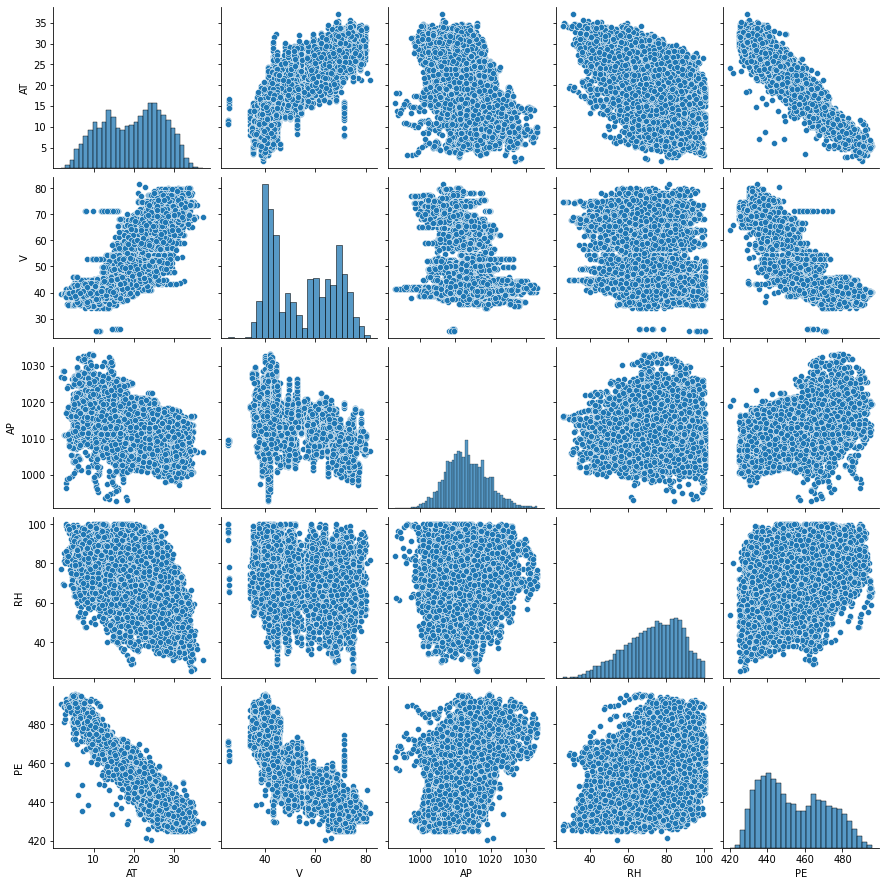

In [18]:
import seaborn

plt = seaborn.pairplot(data)
plt.savefig('save_as_a_png.png')
plt

In [94]:
X = data[['PE', 'V', 'AP', 'RH']]
y = data['AT']
Xy = pd.concat((y, X), axis=1)

lm = LM()
lm.fit(X, y)

print(dict(zip(lm.feature_names_in_, lm.coef_)))
print(lm.intercept_)
print(Xy.corr())
print(lm.partial_corr)
print(calculate_r2(y, lm.predict(X)))
print(lm.check_r2())

{'PE': -0.32175875912520474, 'V': 0.06590126013584492, 'AP': -0.07242444400084429, 'RH': -0.1094783722263848}
243.67880483551198
          AT        PE         V        AP        RH
AT  1.000000 -0.948128  0.844107 -0.507549 -0.542535
PE -0.948128  1.000000 -0.869780  0.518429  0.389794
V   0.844107 -0.869780  1.000000 -0.413502 -0.312187
AP -0.507549  0.518429 -0.413502  1.000000  0.099574
RH -0.542535  0.389794 -0.312187  0.099574  1.000000
          AT        PE         V        AP        RH
AT  1.000000 -0.797673  0.217964 -0.193691 -0.620805
PE -0.797673  1.000000 -0.312074  0.066973 -0.361525
V   0.217964 -0.312074  1.000000  0.135442  0.190030
AP -0.193691  0.066973  0.135442  1.000000 -0.224985
RH -0.620805 -0.361525  0.190030 -0.224985  1.000000
0.9391532162095183
(36900.56255700208, 0.0)


In [95]:
X = data[['PE', 'RH']]
y = data['AT']
Xy = pd.concat((y, X), axis=1)

lm = LM()
lm.fit(X, y)

print(dict(zip(lm.feature_names_in_, lm.coef_)))
print(lm.intercept_)
print(Xy.corr())
print(lm.partial_corr)
print(calculate_r2(y, lm.predict(X)))
print(lm.check_r2())

{'PE': -0.37929635697143094, 'RH': -0.10410169565451992}
199.62181289054726
          AT        PE        RH
AT  1.000000 -0.948128 -0.542535
PE -0.948128  1.000000  0.389794
RH -0.542535  0.389794  1.000000
          AT        PE        RH
AT  1.000000 -0.952253 -0.590824
PE -0.952253  1.000000 -0.466598
RH -0.590824 -0.466598  1.000000
0.9342222960486607
(67924.5072792146, 0.0)


In [98]:
import plotly.graph_objects as go
from itertools import product

fig = go.Figure()

at_for_3d = np.linspace(X['PE'].min(), X['PE'].max(), 4)
v_for_3d = np.linspace(X['RH'].min(), X['RH'].max(), 4)

X_test = pd.DataFrame(product(at_for_3d, v_for_3d))
X_test.columns = ['PE', 'RH']

y_test = lm.predict(X_test).to_numpy().reshape((4, 4)).T

# X_test = pd.DataFrame({'AT': x_for_3d, })

# xy_data = np.array(list(product(y_for_3d, x_for_3d)))
# # xy_data[:,[0, 1]] = xy_data[:,[1, 0]]

# xy_data

# z = lm.predict(xy_data)
# z = z.reshape((len(y_for_3d), len(x_for_3d)))

fig.add_scatter3d(x=X['PE'], y=X['RH'], z=y, mode='markers')

print(at_for_3d)
print(v_for_3d)
print(np.flip(y_test))

fig.add_surface(x=at_for_3d, y=v_for_3d, z=y_test)

fig.update_layout(margin={'l': 5, 'r': 5, 'b': 5, 't': 5})

fig.show()

[420.26       445.42666667 470.59333333 495.76      ]
[ 25.56        50.42666667  75.29333333 100.16      ]
[[ 1.15502512 10.70065011 20.24627509 29.79190007]
 [ 3.74368729 13.28931227 22.83493725 32.38056224]
 [ 6.33234945 15.87797444 25.42359942 34.9692244 ]
 [ 8.92101162 18.4666366  28.01226159 37.55788657]]


Unsupported